# Google Colab

Source: https://colab.research.google.com/

Free Online CPU/GPUs

Create a new Google Colab notebook

Run experiments


# Alternatively, You Can  Install Conda and PyTorch at local machine

Conda : https://docs.conda.io/en/latest/miniconda.html

PyTorch : https://pytorch.org/get-started/locally/




# More Resources


PyTorch Docs:
https://pytorch.org/docs/stable/index.html

Conda Docs:
https://docs.conda.io/projects/conda/en/stable/

Jupyter Docs:
https://jupyter-notebook.readthedocs.io/en/stable/


Youtube series for reference:  https://www.youtube.com/playlist?list=PL_lsbAsL_o2CTlGHgMxNrKhzP97BaG9ZN


# PyTorch Official Tutorial Example:

https://pytorch.org/tutorials/beginner/basics/intro.html

# Lets Start!

In [ ]:
import torch
import numpy as np

# Initializing a Tensor

Tensors can be initialized in various ways. Take a look at the following examples:



In [ ]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

print(x_data)
print(type(x_data))

print(x_data.sum())
print(x_data.sum(0))
print(x_data.sum(1))

# equivalent function
print(torch.sum(x_data))
print(torch.sum(x_data, axis=0))

tensor([[1, 2],
        [3, 4]])
<class 'torch.Tensor'>
tensor(10)
tensor([4, 6])
tensor([3, 7])
tensor(10)
tensor([4, 6])


# From a NumPy array

Tensors can be created from NumPy arrays (and vice versa - see Bridge with NumPy).

In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(x_np)
print(type(x_np))

# convert tensor to numpy
x_tn=x_np.numpy()
print(x_tn)
print(type(x_tn))

tensor([[1, 2],
        [3, 4]])
<class 'torch.Tensor'>
[[1 2]
 [3 4]]
<class 'numpy.ndarray'>


# From another tensor:

The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.

In [ ]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.0489, 0.0245],
        [0.7623, 0.2731]]) 



# Attributes of a Tensor

Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


# Operations on Tensors

By default, tensors are created on the CPU. We need to explicitly move tensors to the GPU using .to method (after checking for GPU availability). Keep in mind that copying large tensors across devices can be expensive in terms of time and memory!


In [ ]:
device = "cpu" # if you want to train your network on CPU
# device = "cuda" if you want to train your network on GPUs (faster)

if torch.cuda.is_available():
    tensor = tensor.to("cuda")

### Standard numpy-like indexing and slicing:

In [ ]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


### Joining tensors You can use torch.cat to concatenate a sequence of tensors along a given dimension. See also torch.stack, another tensor joining operator that is subtly different from torch.cat.

In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


### Arithmetic operations

In [ ]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
# ``tensor.T`` returns the transpose of a tensor
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

### Single-element tensors
 If you have a one-element tensor, for example by aggregating all values of a tensor into one value, you can convert it to a Python numerical value using item():

In [ ]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


### In-place operations
Operations that store the result into the operand are called in-place. They are denoted by a _ suffix. For example: x.copy_(y), x.t_(), will change x.

In [ ]:
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


Over 100 tensor operations, including:
arithmetic,
linear algebra,
matrix manipulation (transposing, indexing, slicing),
sampling
and more are comprehensively described here:
https://pytorch.org/docs/stable/torch.html
Cheatsheet here: https://pytorch-for-numpy-users.wkentaro.com/

# Datasets & DataLoaders

Fashion-MNIST
Xiao et al. Fashion-mnist: a novel image dataset for benchmarking
machine learning algorithms. arXiv preprint arXiv:1708.07747.
28 × 28 grayscale images
70, 000 fashion products
10 categories
7, 000 images per category
The training set has 60, 000 images
and the test set has 10, 000 images.


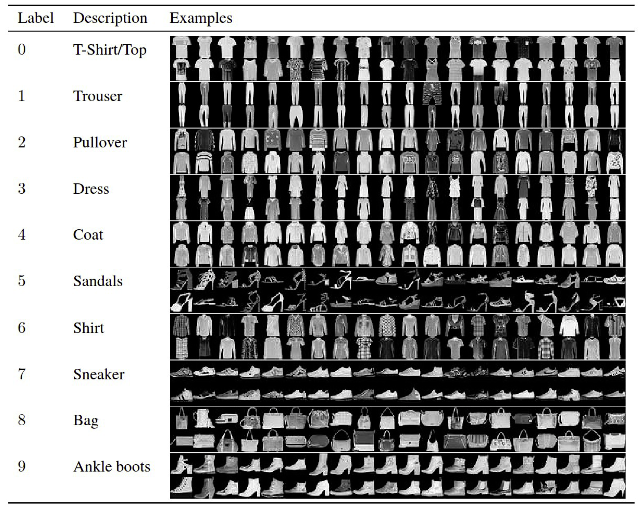


### Loading a Dataset

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

# Iterating and Visualizing the Dataset

We can index Datasets manually like a list: training_data[index]. We use matplotlib to visualize some samples in our training data.

img.shape torch.Size([1, 28, 28])


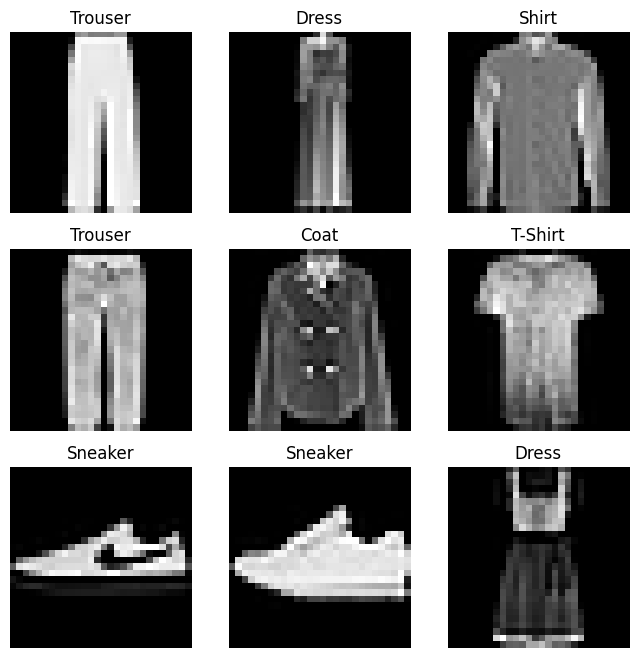

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

print("img.shape", img.shape)
plt.show()

# Creating a Custom Dataset for your files

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

# Preparing your data for training with DataLoaders

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# Iterate through the DataLoader

We have loaded that dataset into the DataLoader and can iterate through the dataset as needed. Each iteration below returns a batch of train_features and train_labels (containing batch_size=64 features and labels respectively). Because we specified shuffle=True, after we iterate over all batches the data is shuffled (for finer-grained control over the data loading order, take a look at Samplers).

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


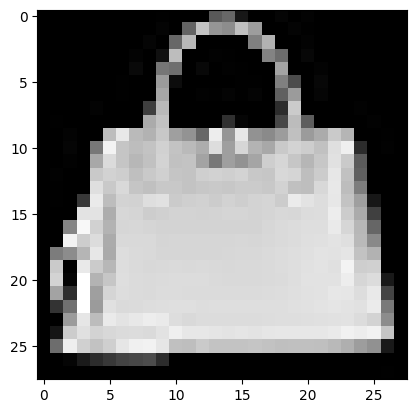

Label: 8


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Transforms

The FashionMNIST features are in PIL Image format, and the labels are integers. For training, we need the features as normalized tensors, and the labels as one-hot encoded tensors. To make these transformations, we use ToTensor and Lambda.

In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

# Build Model




In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### Get Device for Training

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

### Define the Class

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
model1 = NeuralNetwork().to(device)
print(model1)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


To use the model, we pass it the input data. This executes the model’s forward, along with some background operations. Do not call model.forward() directly!

Calling the model on the input returns a 2-dimensional tensor with dim=0 corresponding to each output of 10 raw predicted values for each class, and dim=1 corresponding to the individual values of each output. We get the prediction probabilities by passing it through an instance of the nn.Softmax module.

In [ ]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([2])


# Optimization

### Loss Function

Common loss functions include nn.MSELoss (Mean Square Error) for regression tasks, and nn.NLLLoss (Negative Log Likelihood) for classification. nn.CrossEntropyLoss combines nn.LogSoftmax and nn.NLLLoss.

We pass our model’s output logits to nn.CrossEntropyLoss, which will normalize the logits and compute the prediction error.


In [ ]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

### Optimizer

We initialize the optimizer by registering the model’s parameters that need to be trained, and passing in the learning rate hyperparameter.



In [ ]:
learning_rate = 1e-2
batch_size = 64
epochs = 5

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


Inside the training loop, optimization happens in three steps:

      Call optimizer.zero_grad() to reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.

      Backpropagate the prediction loss with a call to loss.backward(). PyTorch deposits the gradients of the loss w.r.t. each parameter.

      Once we have our gradients, we call optimizer.step() to adjust the parameters by the gradients collected in the backward pass.



### Training loop

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")




### Test loop

In [ ]:
def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

### Full Implementation

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model1, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.578366  [   64/60000]
loss: 0.494248  [ 6464/60000]
loss: 0.651543  [12864/60000]
loss: 0.426310  [19264/60000]
loss: 0.385318  [25664/60000]
loss: 0.515179  [32064/60000]
loss: 0.317650  [38464/60000]
loss: 0.562379  [44864/60000]
loss: 0.315183  [51264/60000]
loss: 0.415893  [57664/60000]
Test Error: 
 Accuracy: 83.6%, Avg loss: 0.457567 

Epoch 2
-------------------------------
loss: 0.225158  [   64/60000]
loss: 0.463568  [ 6464/60000]
loss: 0.293832  [12864/60000]
loss: 0.235506  [19264/60000]
loss: 0.377969  [25664/60000]
loss: 0.537388  [32064/60000]
loss: 0.351985  [38464/60000]
loss: 0.310000  [44864/60000]
loss: 0.382577  [51264/60000]
loss: 0.415288  [57664/60000]
Test Error: 
 Accuracy: 83.6%, Avg loss: 0.455901 

Epoch 3
-------------------------------
loss: 0.447730  [   64/60000]
loss: 0.248914  [ 6464/60000]
loss: 0.444501  [12864/60000]
loss: 0.311886  [19264/60000]
loss: 0.356679  [25664/60000]
loss: 0.353991  [32064/600

# Save and Load the Model

### Saving and Loading Model Weights

PyTorch models store the learned parameters in an internal state dictionary, called state_dict. These can be persisted via the torch.save method:

In [ ]:
#model = models.vgg16(weights='IMAGENET1K_V1')
torch.save(model.state_dict(), 'model_weights_CV_Tutorial')

To load model weights, you need to create an instance of the same model first, and then load the parameters using load_state_dict() method.

In [ ]:
#model = models.vgg16() # we do not specify ``weights``, i.e. create untrained model
model1.load_state_dict(torch.load('model_weights_CV_Tutorial'))
model1.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

### Saving and Loading Models with Shape

When loading model weights, we needed to instantiate the model class first, because the class defines the structure of a network. We might want to save the structure of this class together with the model, in which case we can pass model (and not model.state_dict()) to the saving function:

In [ ]:
torch.save(model, 'model.pth')

We can then load the model like this:

In [ ]:
model = torch.load('model.pth')